<a href="https://colab.research.google.com/github/w4bo/teaching-handsondatapipelines/blob/main/materials/14-Iris.solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The IRIS challenge

### Goal

It is your job to predict the species for each iris plant. For each iris plant, you must predict the `Species` variable.

### Metric

Submissions are evaluated using the accuracy score. When splitting train and test datasets, the test dataset should contain 40% of the data.

### Requirements

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# df = pd.read_csv('datasets/iris.csv')
df = pd.read_csv('https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/iris.csv')

## Data understanding

Hints
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- Each observation is labelled with a `Species`

Take a first glance to the `df`
- Do we consider all features?
- Are there null values?
- Which are the attribute types?
- Which are the attribute ranges?
- How many labels?
- Are classes unbalanced?

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Species'].value_counts()

### Summing up

| Question | Answer | Do we need action? |
| -        | -      | - |
| Are the null values? | No | No imputation |
|Which are the attribute types? | All attributes are numeric | No encoding |
|Which are the attribute ranges? | Attribute ranges are similar | No normalization |
|How many labels? | 3 | - |
|Are classes unbalanced? | No, classess are equally distributed | No rebalancing |

IRIS is a simple dataset, it is useful for this lab but is not really representative for real-world ML tasks.

### Data visualization

Check the value distribution

In [ ]:
tmp = df.drop('Id', axis=1)
tmp.hist(bins=50, figsize=(20,15))
plt.show()

Check variable relationships

In [ ]:
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [ ]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [ ]:
from scipy.stats import pearsonr
rho = tmp.corr(method ='pearson')
pval = tmp.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

In [ ]:
min_corr = 0.3
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(8, 6))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True))

#### Summing up

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

## Modeling with scikit-learn

Preparing the dataset for the ML pipeline.
- X: the dataset
- y: the labels

In [ ]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

In [ ]:
X

In [ ]:
y

## Train and test on the same dataset

- Pick a classifier from SKLearn (e.g., logistic regression, decision tree, random forest, k-NN classifier) and train your model on the entire dataset

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, scores)
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

### Summing up

- Training on the entire dataset *is not* suggested since the end goal is to predict iris species using a dataset the model has not seen before.
- There is also a *high* risk of overfitting the training data.

## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set.
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

Split the training and test sets such that the test set contains 40% of the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Fit your model and try it with several parameters

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

You can also try different models (check https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Predict the outcome of an unseen observation (hint use the `.predict()` method)

In [ ]:
# To train the model on the entire dataset
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

In [ ]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

In [ ]:
logreg.predict([[6, 3, 4, 2]])

## Doing some plots

In [10]:
xlabel = "Larghezza del petalo (cm)"
ylabel = "Lunghezza del petalo (cm)"
ctitle = "IRIS"
legend = "Classe"
figsize = (8,6)
xlim=[0, 7]
ylim=[0, 3]

<ipython-input-11-339bce9bd033>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

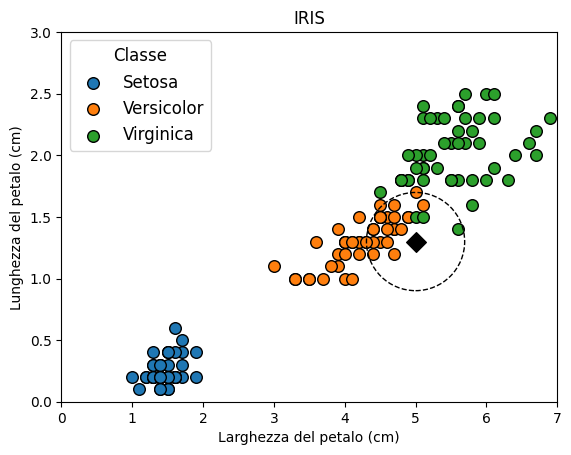

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Download the saved image file
from google.colab import files

# Load Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Selecting petal width and petal length columns
y = iris.target

# Map target labels to class names
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
target_names = [class_names[i] for i in range(len(class_names))]
# Plot the dataset points
for i, class_name in enumerate(target_names):
    class_data = X[y == i]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)

plt.scatter(5, 1.3, s=5000, facecolors='none', edgecolors='black', linestyle='--')
plt.scatter(5, 1.3, s=100, marker="D", facecolors='black', edgecolors='black')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(ctitle)
plt.legend(title=legend, loc=2)

for ext in ["svg", "pdf"]:
  plt.savefig(f'iris.{ext}')
  files.download(f'iris.{ext}')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron

def plot_boundary(clf, title, norm=False):
    # Load Iris dataset
    iris = load_iris()

    cxlim = xlim if not norm else [-0.02, 1.02]
    cylim = ylim if not norm else [-0.02, 1.02]

    X = iris.data[:, 2:4]  # Selecting petal width and petal length columns
    y = iris.target

    if norm:
      scaler = MinMaxScaler(feature_range=(0, 1))
      X = scaler.fit_transform(X)

    # Train a classifier
    clf.fit(X, y)

    # Create a meshgrid for plotting decision boundaries
    x_min, x_max = [cxlim[0] - 0.5, cxlim[1] + 0.5] # X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = [cylim[0] - 0.5, cylim[1] + 0.5] # X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.3, colors=["blue", "white", "green", "orange", "white"])

    # Map target labels to class names
    class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
    target_names = [class_names[i] for i in range(len(class_names))]
    # Plot the dataset points
    for i, class_name in enumerate(target_names):
        class_data = X[y == i]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.xlim(cxlim)
    plt.ylim(cylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ctitle)
    plt.legend(title=legend, loc=2)

    for ext in ["svg", "pdf"]:
      # Save the plot as an image file
      plt.savefig(f'{title}.{ext}')
      files.download(f'{title}.{ext}')
    return clf

<ipython-input-12-91253d2b5596>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

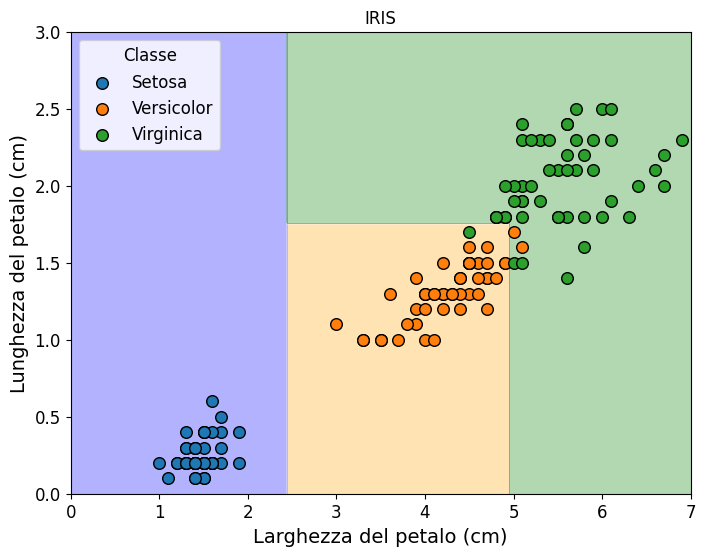

In [13]:
tree = plot_boundary(DecisionTreeClassifier(max_depth=3), "decisiontree_cplot")

In [14]:
# Plot the decision tree
# plt.figure(figsize=figsize)
# plot_tree(tree, feature_names=['Petal Width', 'Petal Length'], class_names=[str(target) for target in iris.target_names], filled=True, rounded=True)


<ipython-input-12-91253d2b5596>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNeighborsClassifier(n_neighbors=20)

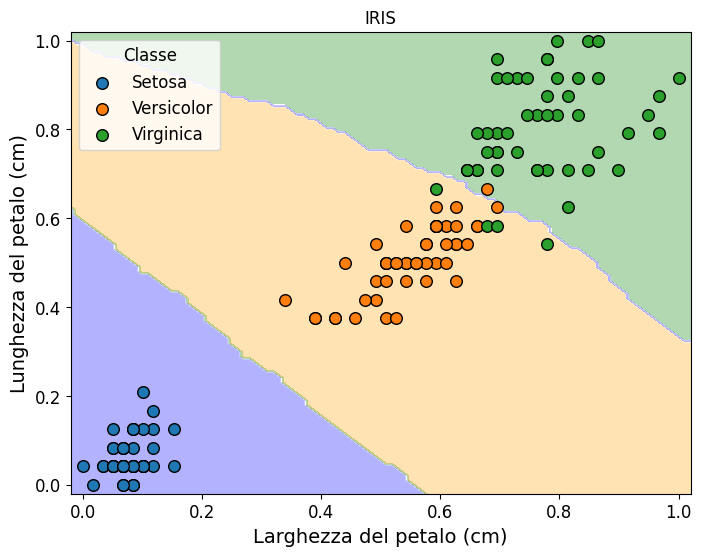

In [15]:
from sklearn.neighbors import KNeighborsClassifier
plot_boundary(KNeighborsClassifier(n_neighbors=20), "knn_cplot", norm=True)

<ipython-input-12-91253d2b5596>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomForestRegressor()

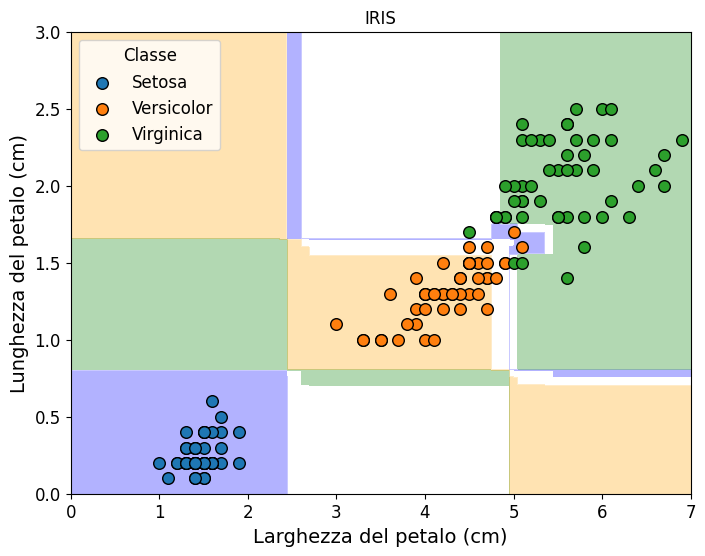

In [16]:
from sklearn.ensemble import RandomForestRegressor
plot_boundary(RandomForestRegressor(), "rf_cplot")

<ipython-input-12-91253d2b5596>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perceptron()

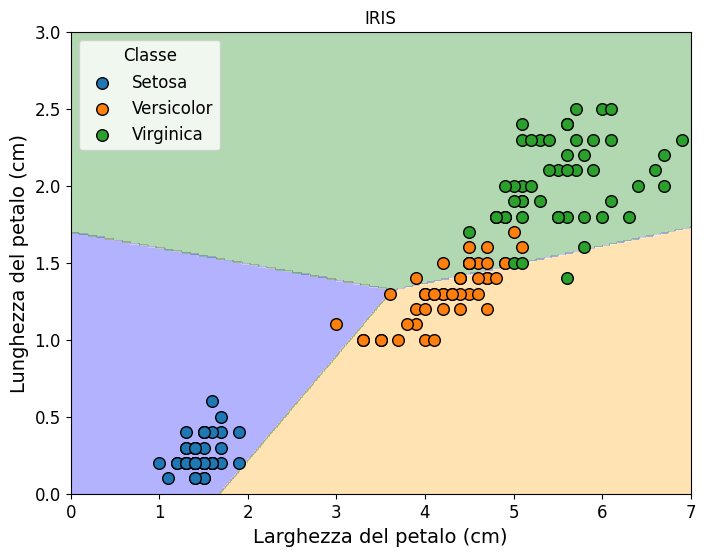

In [17]:
# Perceptron uses the OVA (One Versus All) strategy for multiclasses
plot_boundary(Perceptron(), "perceptron_cplot")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-12-91253d2b5596>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(class_data[:, 0], class_data[:, 1], label=class_name, cmap='viridis', edgecolor='k', s=70)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MLPClassifier(hidden_layer_sizes=(10, 20), random_state=42)

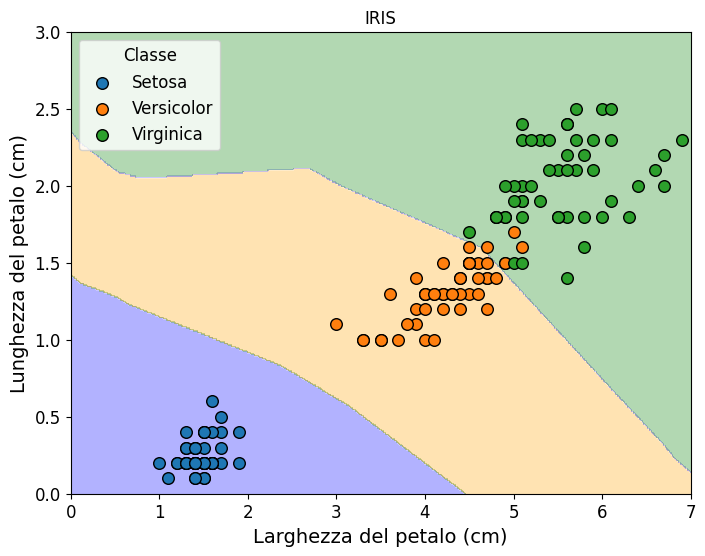

In [18]:
from sklearn.neural_network import MLPClassifier
plot_boundary(MLPClassifier(hidden_layer_sizes=(10, 20), random_state=42), "mlp_cplot")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

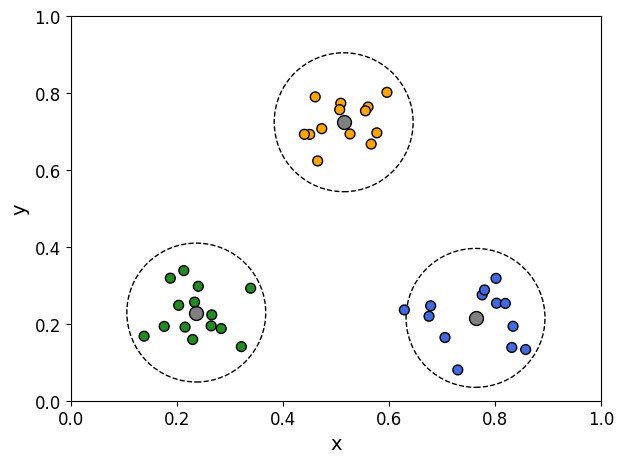

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with three clusters
X, y = make_blobs(n_samples=40, cluster_std=0.06, centers= [[0.25, 0.25], [0.5, 0.75], [0.75, 0.25]], random_state=41)
# scaler = MinMaxScaler(feature_range=(0, 1))
# X = scaler.fit_transform(X)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=39)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the original data points with colors representing the three clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], ls='--', c='white', edgecolors='black', s=10000, label='Centroids')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='grey', edgecolors='black', s=100, label='Centroids')
colors = ['orange' if label == 0 else 'forestgreen' if label == 1 else 'royalblue' for label in labels]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k', s=50)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1, 2], cmap='viridis', edgecolors='k', marker='D', s=200, label='Centroids')


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
# plt.title(ctitle)
# plt.legend(title=legend, loc=2)
title='clustering'
for ext in ["svg", "pdf"]:
  # Save the plot as an image file
  plt.savefig(f'{title}.{ext}')
  files.download(f'{title}.{ext}')